#**GOLD PRICE PREDICTION**

---



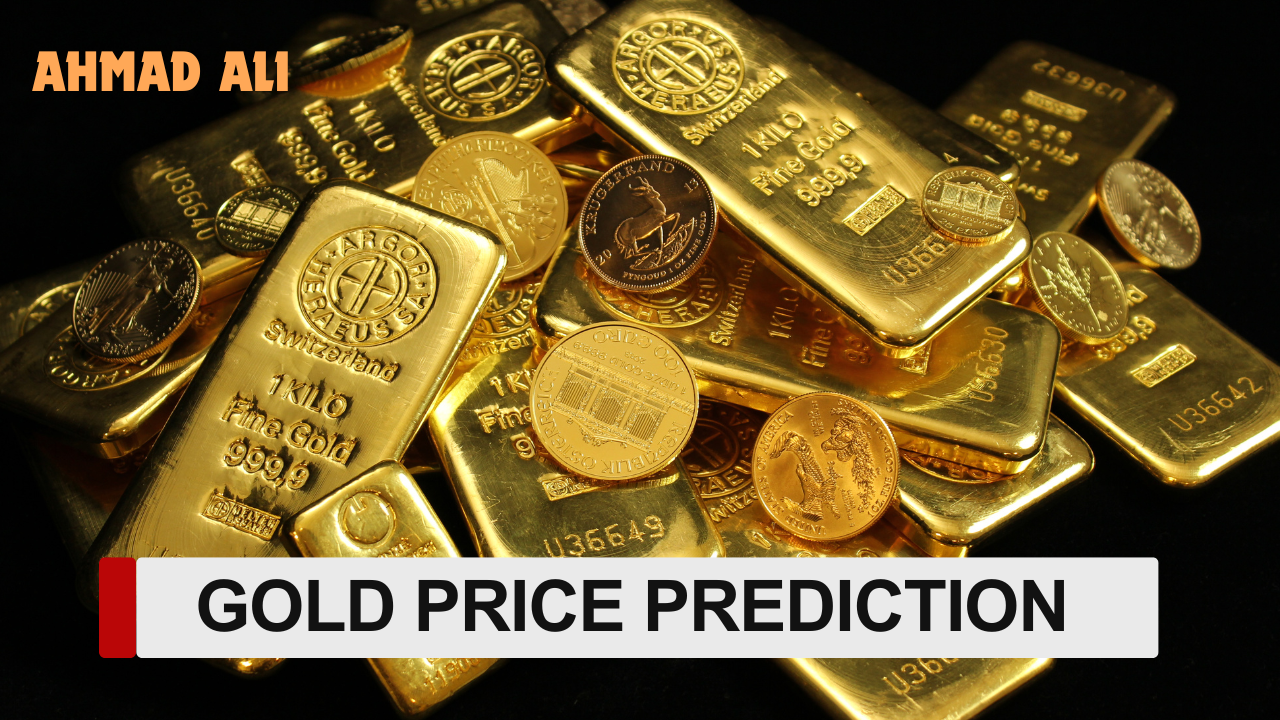

In [1]:
# Importing the pandas library for data manipulation and analysis
import pandas as pd

# Importing the numpy library for numerical operations
import numpy as np

# Importing the matplotlib library for plotting and visualization
import matplotlib.pyplot as plt

# Importing the seaborn library for statistical data visualization
import seaborn as sns


In [2]:
# Load the dataset (assuming it's stored in a CSV file)
gold_data = pd.read_csv('/content/goldstock.csv')


In [3]:
# Display the dimensions (number of rows and columns) of the DataFrame 'gold_data'
gold_data.shape


(2511, 7)

In [4]:
# Display the first five rows of the DataFrame 'gold_data'
gold_data.head()


,no,Date,Close,Volume,Open,High,Low
0,0,1/19/2024,2029.3,166078,2027.4,2041.9,2022.2
1,1,1/18/2024,2021.6,167013,2009.1,2025.6,2007.7
2,2,1/17/2024,2006.5,245194,2031.7,2036.1,2004.6
3,3,1/16/2024,2030.2,277995,2053.4,2062.8,2027.6
4,4,1/12/2024,2051.6,250946,2033.2,2067.3,2033.1


In [5]:
# Display the data types of each column in the DataFrame 'gold_data'
gold_data.dtypes


no          int64
Date       object
Close     float64
Volume      int64
Open      float64
High      float64
Low       float64
dtype: object

In [6]:
# Convert the 'Date' column to datetime format using pandas
gold_data['Date'] = pd.to_datetime(gold_data['Date'])

# Set the 'Date' column as the index of the DataFrame 'gold_data'
gold_data.set_index('Date', inplace=True)

# Display the data types of each column in the modified DataFrame 'gold_data'
gold_data.dtypes


no          int64
Close     float64
Volume      int64
Open      float64
High      float64
Low       float64
dtype: object

In [7]:
# Rename columns 'Open', 'High', 'Low', and 'Close' to lowercase
gold_data.rename(columns={'Open': 'open', 'High': 'high', 'Low': 'low', 'Close': 'close'}, inplace=True)

# Display the first five rows of the modified DataFrame 'gold_data'
gold_data.head()


,no,close,Volume,open,high,low
Date,,,,,,
2024-01-19,0,2029.3,166078,2027.4,2041.9,2022.2
2024-01-18,1,2021.6,167013,2009.1,2025.6,2007.7
2024-01-17,2,2006.5,245194,2031.7,2036.1,2004.6
2024-01-16,3,2030.2,277995,2053.4,2062.8,2027.6
2024-01-12,4,2051.6,250946,2033.2,2067.3,2033.1


In [8]:
# Display concise summary of the DataFrame 'gold_data', including data types and memory usage
gold_data.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2511 entries, 2024-01-19 to 2014-01-22
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   no      2511 non-null   int64  
 1   close   2511 non-null   float64
 2   Volume  2511 non-null   int64  
 3   open    2511 non-null   float64
 4   high    2511 non-null   float64
 5   low     2511 non-null   float64
dtypes: float64(4), int64(2)
memory usage: 137.3 KB


In [9]:
# Count the number of missing values (NaN) in each column of the DataFrame 'gold_data'
gold_data.isna().sum()


no        0
close     0
Volume    0
open      0
high      0
low       0
dtype: int64

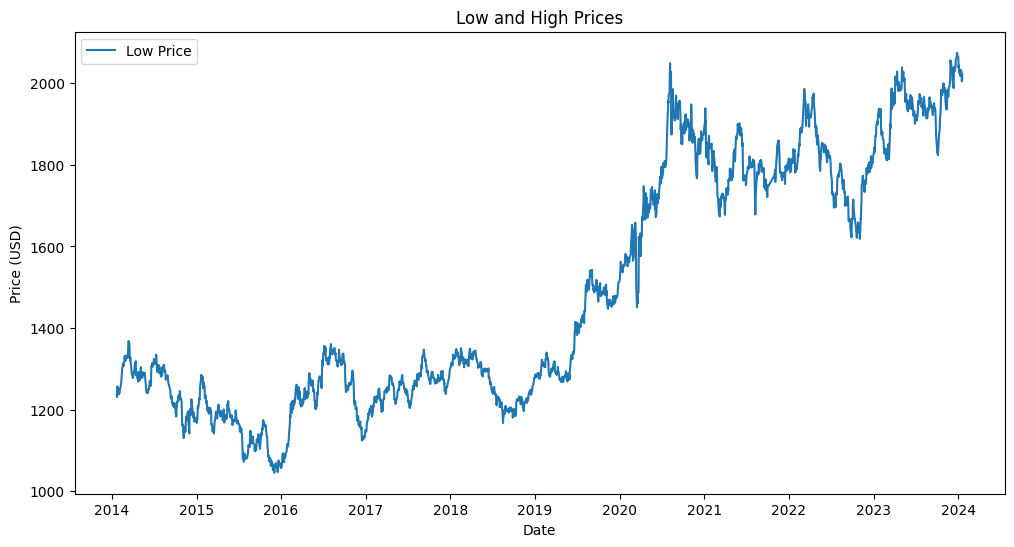

In [10]:
# Create a figure with a specific size
plt.figure(figsize=(12, 6))

# Create a line plot using seaborn to visualize 'Low Price' over time
sns.lineplot(data=gold_data, x='Date', y='low', label='Low Price')

# Set the title of the plot
plt.title('Low and High Prices')

# Label the x-axis
plt.xlabel('Date')

# Label the y-axis
plt.ylabel('Price (USD)')

# Display the legend on the plot
plt.legend()

# Show the plot
plt.show()


In [11]:
# Display the column names of the DataFrame 'gold_data'
gold_data.columns


Index(['no', 'close', 'Volume', 'open', 'high', 'low'], dtype='object')

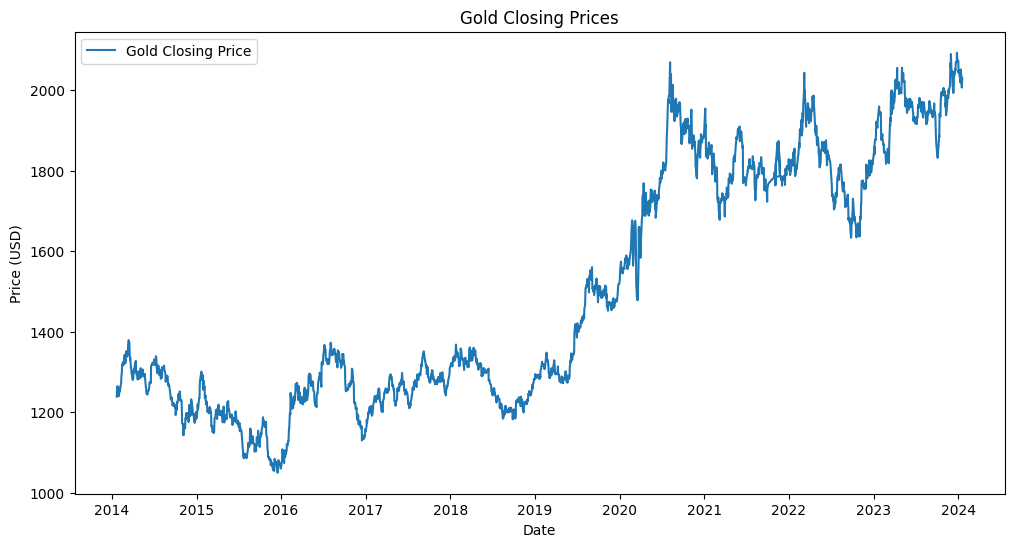

In [12]:
# Plot closing prices for initial visualization
plt.figure(figsize=(12, 6))

# Plot the 'close' column from gold_data
plt.plot(gold_data['close'], label='Gold Closing Price')

# Set the title of the plot
plt.title('Gold Closing Prices')

# Label the x-axis
plt.xlabel('Date')

# Label the y-axis
plt.ylabel('Price (USD)')

# Display the legend on the plot
plt.legend()

# Show the plot
plt.show()


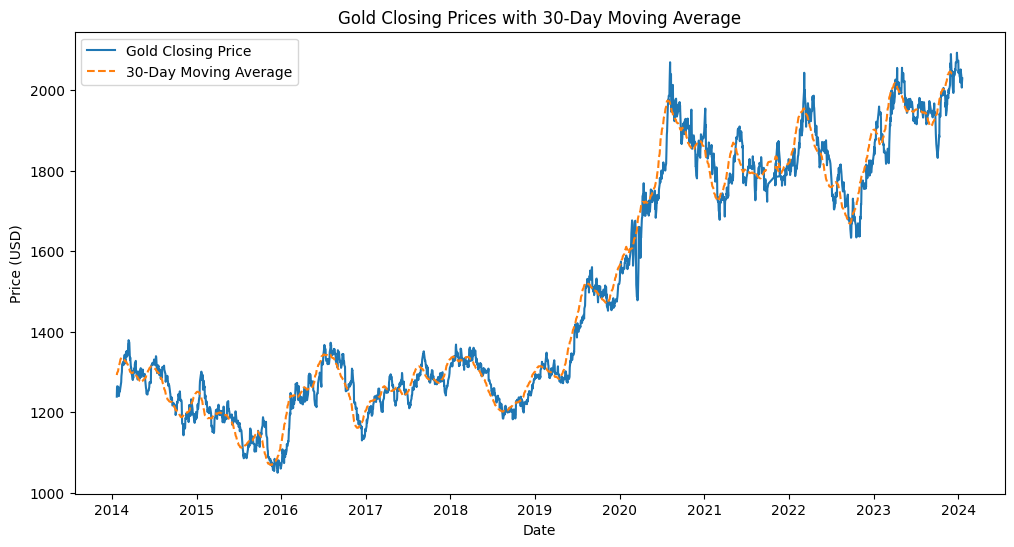

In [13]:
# Calculate 30-day moving average for trend identification
gold_data['MA_30'] = gold_data['close'].rolling(window=30).mean()

# Plot original closing prices and moving average
plt.figure(figsize=(12, 6))

# Plot the original closing prices
plt.plot(gold_data['close'], label='Gold Closing Price')

# Plot the 30-day moving average with dashed line style
plt.plot(gold_data['MA_30'], label='30-Day Moving Average', linestyle='--')

# Set the title of the plot
plt.title('Gold Closing Prices with 30-Day Moving Average')

# Label the x-axis
plt.xlabel('Date')

# Label the y-axis
plt.ylabel('Price (USD)')

# Display the legend on the plot
plt.legend()

# Show the plot
plt.show()


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsm

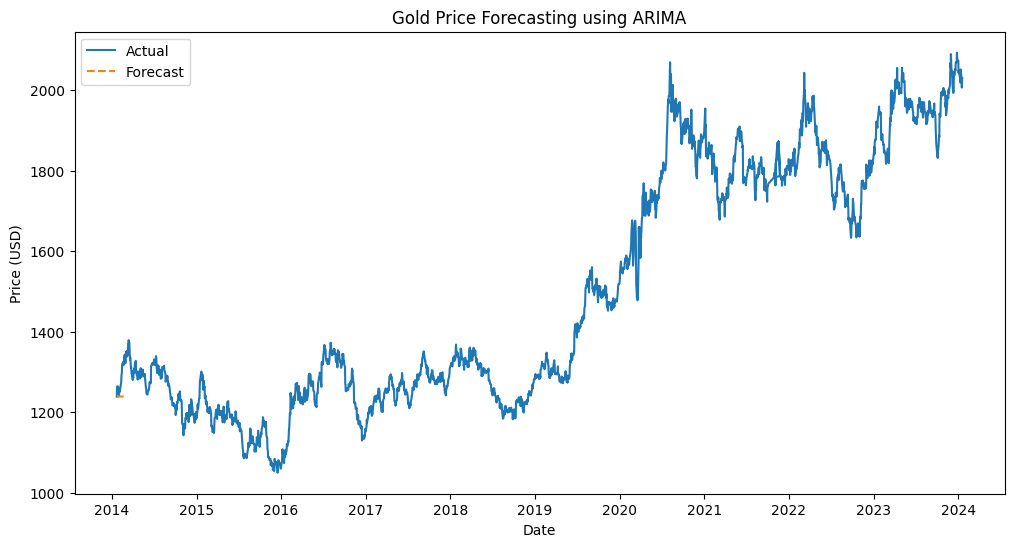

Mean Squared Error (MSE): 4161.579773310184


In [14]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

# Fit ARIMA model
model = ARIMA(gold_data['close'], order=(5, 1, 0))  # Example order, tune as needed
model_fit = model.fit()

# Forecast future prices
forecast_steps = 30  # Example: forecast next 30 days
forecast = model_fit.forecast(steps=forecast_steps)

# Plot original data and forecast
plt.figure(figsize=(12, 6))
plt.plot(gold_data.index, gold_data['close'], label='Actual')  # Plot actual prices
plt.plot(pd.date_range(start=gold_data.index[-1], periods=forecast_steps + 1, freq='D')[1:], forecast, label='Forecast', linestyle='--')  # Plot forecasted prices
plt.title('Gold Price Forecasting using ARIMA')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()

# Evaluate model performance
mse = mean_squared_error(gold_data['close'][-forecast_steps:], forecast)  # Calculate Mean Squared Error
print(f'Mean Squared Error (MSE): {mse}')  # Print MSE


<ipython-input-18-7faf9f0b0115>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gold_data['Signal'][50:] = np.where(gold_data['MA_50'][50:] > gold_data['MA_200'][50:], 1, -1)  # Generate signals


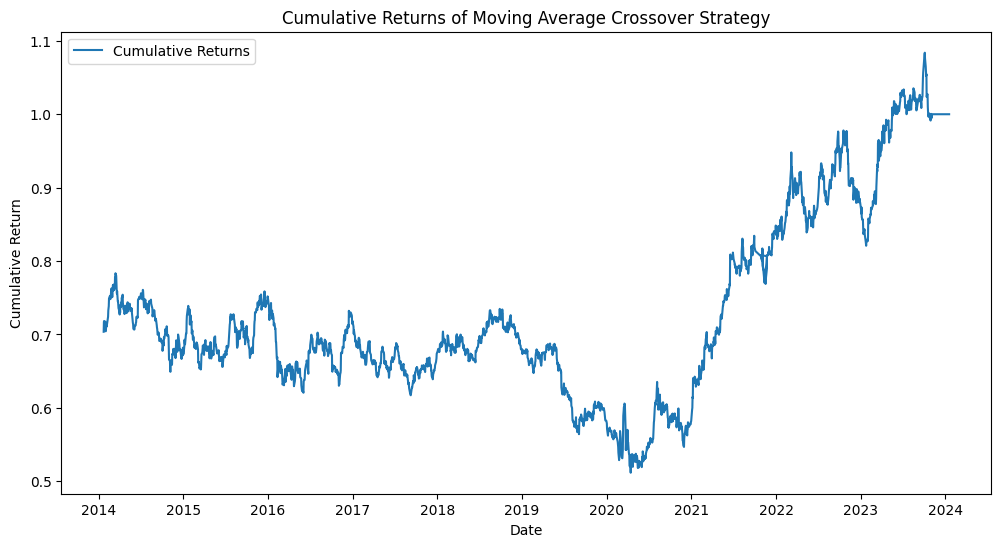

In [18]:
# Implement a simple moving average crossover strategy
gold_data['MA_50'] = gold_data['close'].rolling(window=50).mean()  # Calculate 50-day moving average
gold_data['MA_200'] = gold_data['close'].rolling(window=200).mean()  # Calculate 200-day moving average

# Generate buy/sell signals based on crossover
gold_data['Signal'] = 0  # Initialize signal column
gold_data['Signal'][50:] = np.where(gold_data['MA_50'][50:] > gold_data['MA_200'][50:], 1, -1)  # Generate signals

# Calculate daily returns
gold_data['Daily_Return'] = gold_data['close'].pct_change()  # Calculate daily percentage change in closing prices

# Calculate strategy returns
gold_data['Strategy_Return'] = gold_data['Daily_Return'] * gold_data['Signal'].shift(1)  # Calculate strategy returns

# Calculate cumulative returns
gold_data['Cumulative_Return'] = (1 + gold_data['Strategy_Return']).cumprod()  # Calculate cumulative returns

# Plot cumulative returns
plt.figure(figsize=(12, 6))
plt.plot(gold_data.index, gold_data['Cumulative_Return'], label='Cumulative Returns')  # Plot cumulative returns over time
plt.title('Cumulative Returns of Moving Average Crossover Strategy')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.legend()
plt.show()


In [21]:
gold_data.head()

,no,close,Volume,open,high,low,MA_30,MA_50,MA_200,Signal,Daily_Return,Strategy_Return,Cumulative_Return
Date,,,,,,,,,,,,,
2024-01-19,0,2029.3,166078,2027.4,2041.9,2022.2,NaN,NaN,NaN,0,NaN,NaN,NaN
2024-01-18,1,2021.6,167013,2009.1,2025.6,2007.7,NaN,NaN,NaN,0,-0.003794,-0.0,1.0
2024-01-17,2,2006.5,245194,2031.7,2036.1,2004.6,NaN,NaN,NaN,0,-0.007469,-0.0,1.0
2024-01-16,3,2030.2,277995,2053.4,2062.8,2027.6,NaN,NaN,NaN,0,0.011812,0.0,1.0
2024-01-12,4,2051.6,250946,2033.2,2067.3,2033.1,NaN,NaN,NaN,0,0.010541,0.0,1.0


In [24]:
# Define events and their impact dates
events = {
    'US Fed Interest Rate Decision': ['2014-01-29', '2014-03-19', '2014-06-18'],
    'Brexit Referendum': ['2016-06-23']
    # Add more events as needed
}

# Extract impact dates from dataset and analyze price movements
for event, dates in events.items():
    try:
        event_dates = pd.to_datetime(dates)
        for date in event_dates:
            # Extract price data around event date (e.g., before and after)
            price_before = gold_data.loc[date - pd.DateOffset(days=5): date - pd.DateOffset(days=1), 'close']
            price_after = gold_data.loc[date + pd.DateOffset(days=1): date + pd.DateOffset(days=5), 'close']

            # Compare prices and analyze impact
            if not price_before.empty and not price_after.empty:
                price_change = price_after.mean() - price_before.mean()
                print(f'Event: {event}, Date: {date.date()}, Average Price Change: {price_change:.2f}')
            else:
                print(f'Event: {event}, Date: {date.date()}, Not enough data to calculate price change')
    except Exception as e:
        print(f"Error processing event {event} with dates {dates}: {e}")

Event: US Fed Interest Rate Decision, Date: 2014-01-29, Not enough data to calculate price change
Event: US Fed Interest Rate Decision, Date: 2014-03-19, Not enough data to calculate price change
Event: US Fed Interest Rate Decision, Date: 2014-06-18, Not enough data to calculate price change
Error processing event Brexit Referendum with dates ['2016-06-23']: Timestamp('2016-06-18 00:00:00')
